In [1]:
## First Imports

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from numpy import reshape
import matplotlib.pyplot as plt

In [2]:
## Loading the dataset
(train_luiz_x, train_luiz_y),(test_luiz_x,test_luiz_y) = fashion_mnist.load_data()

In [3]:
## Associating to dictionaries
ds1_luiz = {
    "images":train_luiz_x,
    "labels": train_luiz_y
}

ds2_luiz = {
    "images":test_luiz_x,
    "labels":test_luiz_y
}

# Data Preprocessing

In [4]:
ds1_luiz["images"] = ((ds1_luiz["images"]/255)*2)-1
ds2_luiz["images"] = ((ds2_luiz["images"]/255)*2)-1

In [5]:
## Normalizing the pixels to -1 and 1
ds1_luiz['images'] = np.reshape(ds1_luiz['images'],[-1,28,28,1])
ds2_luiz['images'] = np.reshape(ds2_luiz['images'],[-1,28,28,1])

In [6]:
## Printing the shape of the dictionaries
print("Shape of ds1_luiz:",ds1_luiz['images'].shape)
print("Shape of ds2_luiz:",ds2_luiz['images'].shape)

Shape of ds1_luiz: (60000, 28, 28, 1)
Shape of ds2_luiz: (10000, 28, 28, 1)


In [7]:
## Concatenating both images dictionary
dataset_luiz=dict()
dataset_luiz['images'] = np.concatenate([ds1_luiz["images"], ds2_luiz["images"]])
dataset_luiz['labels'] = np.concatenate([ds1_luiz["labels"], ds2_luiz["labels"]])

## Print 
print("Dataset_luiz shape:",dataset_luiz['images'].shape)
print("Dataset_luiz shape:",dataset_luiz['labels'].shape)
len(dataset_luiz['images'])

Dataset_luiz shape: (70000, 28, 28, 1)
Dataset_luiz shape: (70000,)


70000

In [8]:
ds_images=[]
for i in range(0,len(dataset_luiz['images'])):
  if(dataset_luiz['labels'][i]==1):
    ds_images.append(dataset_luiz['images'][i])

In [9]:
dataset_luiz=ds_images

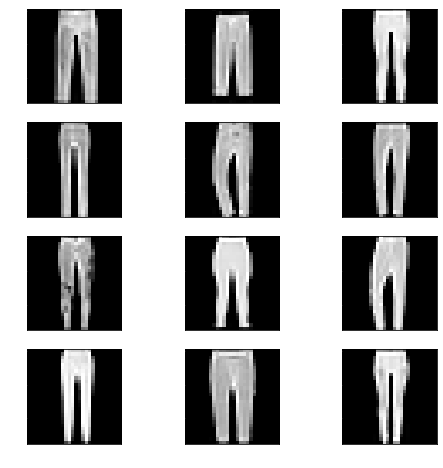

In [10]:
## Displaying only pants in the dataset
fig, axs = plt.subplots(4, 3, figsize=(8,8))
index = 0
for col in range(len(axs)):
  for cell in range(len(axs[col])):
    axs[col][cell].tick_params(axis='both', which='both', grid_alpha=0, colors="w")
    axs[col][cell].imshow(dataset_luiz[index].reshape(28,28),cmap='gray')
    index += 1

In [11]:
## Shuffle 7000 images and batch size of 256
from tensorflow.data import Dataset
train_dataset_luiz = tf.data.Dataset.from_tensor_slices(dataset_luiz).shuffle(7000).batch(256)

# Building the Generator Model of the GAN

In [12]:
## Additional Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Reshape,BatchNormalization, LeakyReLU, Conv2DTranspose, Input,Conv2D, Dropout
from tensorflow import keras
from tensorflow.keras.losses import BinaryCrossentropy
from keras import backend as K

In [13]:
## Creating the discrimator model
generator_model_luiz = Sequential(name="generator_model_luiz")
generator_model_luiz.add(Input(100))
generator_model_luiz.add(Dense(7*7*256, use_bias=False))
generator_model_luiz.add(BatchNormalization())
generator_model_luiz.add(LeakyReLU())
generator_model_luiz.add(Reshape((7,7,256)))
generator_model_luiz.add(Conv2DTranspose(128, (5,5), use_bias=False, padding="same", strides=(1,1)))
generator_model_luiz.add(BatchNormalization())
generator_model_luiz.add(LeakyReLU())
generator_model_luiz.add(Conv2DTranspose(64, (5,5), use_bias=False, padding="same", strides=(2,2)))
generator_model_luiz.add(BatchNormalization())
generator_model_luiz.add(LeakyReLU())
generator_model_luiz.add(Conv2DTranspose(1, (5,5), use_bias=False, padding="same", strides=(2,2), activation="tanh"))

In [14]:
## Generator summary
generator_model_luiz.summary()

Model: "generator_model_luiz"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128

# Sample Untrained Generator

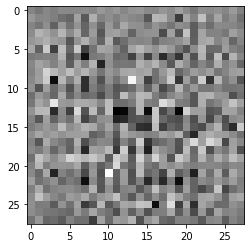

In [15]:
## Using tensorflow random.normal() to create noise on image and display
noise = tf.random.normal(shape=[1,100])
noise_image = generator_model_luiz(noise, training=False)
plt.imshow(noise_image[0, :, :, 0], cmap='gray')

# Building Discriminator Model

In [16]:
## Creating the discrimator model
discriminator_model_luiz = Sequential(name="discriminator_model_luiz")
discriminator_model_luiz.add(Input((28,28,1)))
discriminator_model_luiz.add(Conv2D(64, (5,5), strides=(2,2), input_shape=(28,28,1), padding="same"))
discriminator_model_luiz.add(LeakyReLU())
discriminator_model_luiz.add(Dropout(0.3))
discriminator_model_luiz.add(Conv2D(128, (5,5), strides=(2,2), padding="same"))
discriminator_model_luiz.add(LeakyReLU())
discriminator_model_luiz.add(Dropout(0.3))
discriminator_model_luiz.add(Conv2DTranspose(64, (5,5), use_bias=False, strides=(2,2), padding="same"))
discriminator_model_luiz.add(BatchNormalization())
discriminator_model_luiz.add(LeakyReLU())
discriminator_model_luiz.add(Flatten())
discriminator_model_luiz.add(Dense(1))

In [17]:
## Discriminator summary
discriminator_model_luiz.summary()

Model: "discriminator_model_luiz"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 1

# Implement Training

In [18]:
## Creating loss function
def cross_entropy_luiz(y_pred, y_true):
    luiz_cross = BinaryCrossentropy(from_logits=True)
    return luiz_cross(y_pred, y_true)

In [19]:
## Generator Optimizer
generator_optimizer_luiz = Adam()

In [20]:
## Discriminator Optimizer
discriminator_optimizer_luiz = Adam()

In [21]:
def train_step(images):
    noise = tf.random.normal([256, 100])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:   
        generated_images = generator_model_luiz(noise, training=True)
        
        real_output = discriminator_model_luiz(images, training=True)
        fake_output = discriminator_model_luiz(generated_images, training=True)
        
        gen_loss = cross_entropy_luiz(tf.ones_like(fake_output), fake_output)
        real_loss = cross_entropy_luiz(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy_luiz(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss
        
    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model_luiz.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model_luiz.trainable_variables)    
    generator_optimizer_luiz.apply_gradients(zip(gradients_of_generator, generator_model_luiz.trainable_variables))
    discriminator_optimizer_luiz.apply_gradients(zip(gradients_of_discriminator, discriminator_model_luiz.trainable_variables))

In [22]:
## Epoch training and time
import time

epochs = 10
for i in range(epochs):
    start = time.time()
    for batch in train_dataset_luiz:
        train_step(batch)
    end = time.time()
    duration_time = end - start
    print(f"Epoch:{i}, time:{duration_time}")

Epoch:0, time:52.17858958244324
Epoch:1, time:54.24730467796326
Epoch:2, time:52.143091917037964
Epoch:3, time:55.12702536582947
Epoch:4, time:54.19771599769592
Epoch:5, time:54.040074586868286
Epoch:6, time:55.29910063743591
Epoch:7, time:53.73309922218323
Epoch:8, time:50.801003217697144
Epoch:9, time:44.734389781951904


# Visualized Trained Generator

In [23]:
## Using random.normal()
vectors = []
for i in range(16):
    vector = tf.random.normal((1,100))
    vectors.append(vector)

In [24]:
## Generate an image from generator_model
generated_images = np.array(list(map(lambda vector: generator_model_luiz(vector, training=False), vectors)))

In [25]:
## Normalize the pixels
generated_images = (generated_images * 127.5) + 127.5

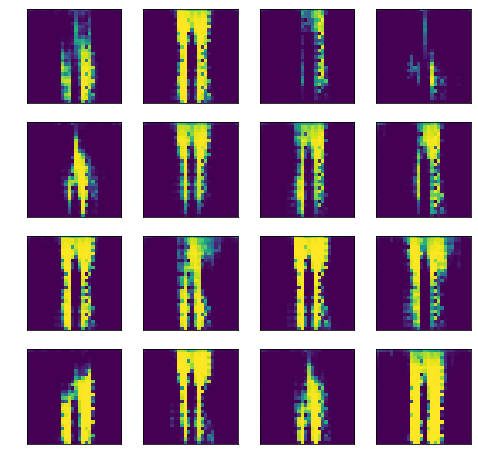

In [26]:
## Display plot image
fig, axs = plt.subplots(4, 4, figsize=(8,8))
current_index = 0
for col in range(len(axs)):
  for cell in range(len(axs[col])):
    axs[col][cell].tick_params(axis='both', which='both', grid_alpha=0, colors="w")
    axs[col][cell].imshow(generated_images[current_index].reshape(28,28))
    current_index += 1